In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
df=pd.read_csv('/home/srishti/datascience_freecodecamp/btc-eth-prices-outliers.csv',index_col=0,
    parse_dates=True)

In [22]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

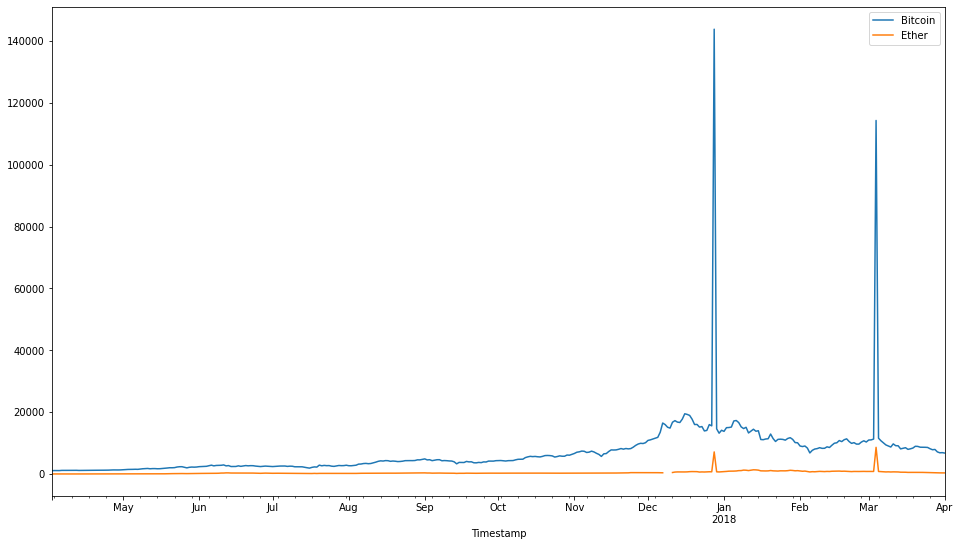

In [23]:
df.plot(figsize=(16,9))

In [36]:
df_na=df.loc['2017-12-1':'2017-12-15']

<AxesSubplot:xlabel='Timestamp'>

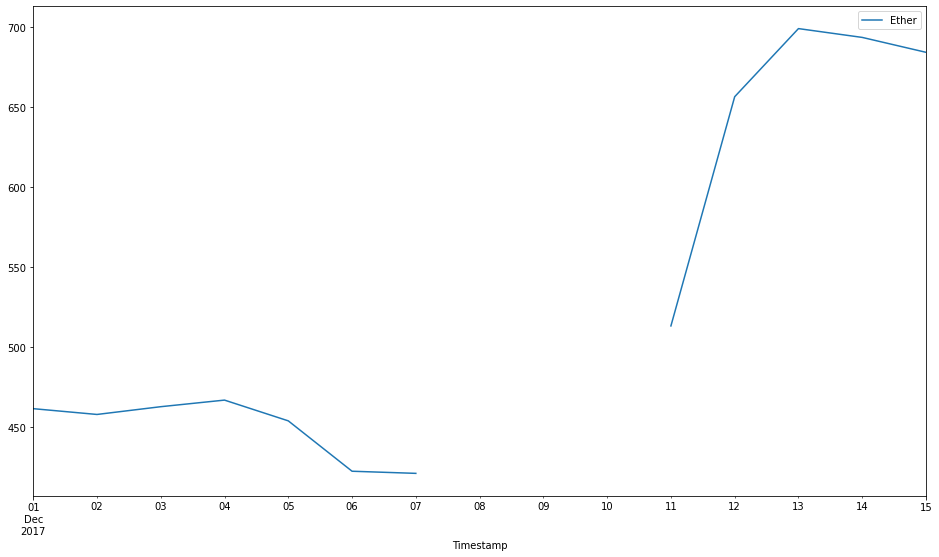

In [29]:
df.loc['2017-12':'2017-12-15'].plot(figsize=(16,9),y='Ether')

In [35]:
df.loc['2017-12':'2017-12-15'].isna().values.any()

True

In [37]:
df_na

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


In [39]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [44]:
df.loc['2017-12-6':'2017-12-11'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29


In [45]:
df.fillna(method='bfill',inplace=True)

In [48]:
df['Ether'].isna().any()

False

<AxesSubplot:xlabel='Timestamp'>

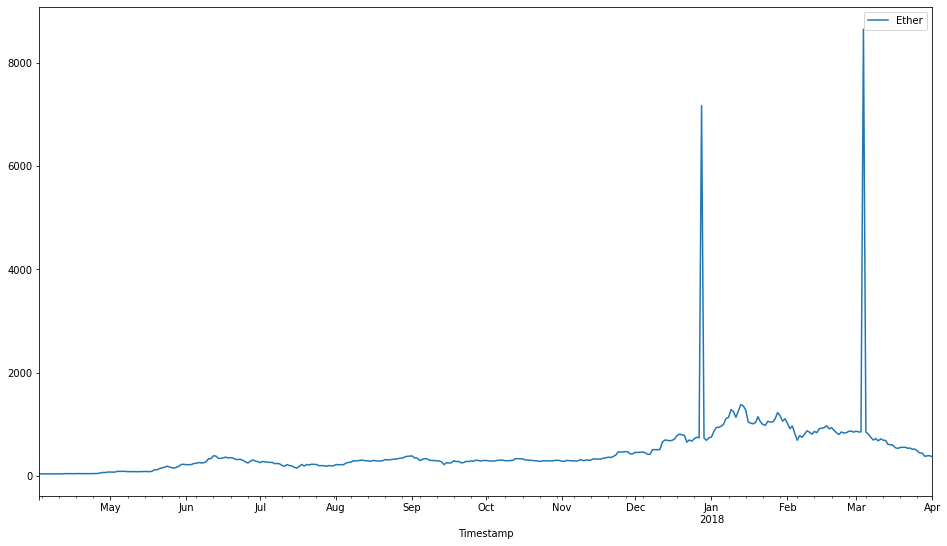

In [49]:
df.plot(y='Ether',figsize=(16,9))

<AxesSubplot:xlabel='Timestamp'>

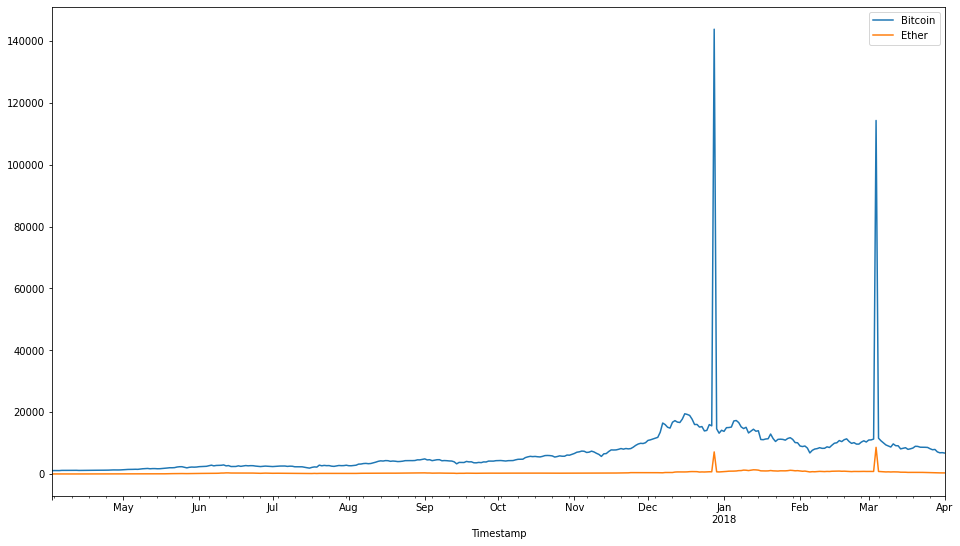

In [51]:
df.plot(figsize=(16,9))

In [52]:
df.loc['2017-12-10':'2018-1-1']

,Bitcoin,Ether
Timestamp,,
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52
2017-12-13,16808.366667,699.09
2017-12-14,16678.892000,693.58
2017-12-15,17771.900000,684.27
2017-12-16,19498.683333,692.83
2017-12-17,19289.785000,717.71
2017-12-18,18961.856667,785.99


<AxesSubplot:xlabel='Timestamp'>

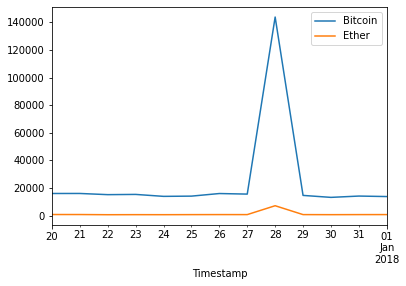

In [57]:
df.loc['2017-12-20':'2018-1-1'].plot()

<AxesSubplot:xlabel='Timestamp'>

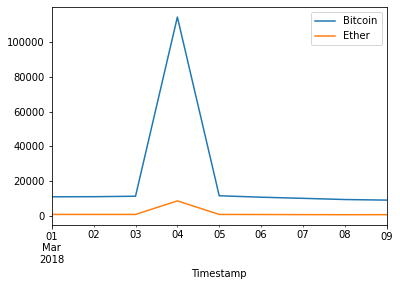

In [58]:
df['2018-03-01': '2018-03-09'].plot()

In [60]:
df_cleaned=df.drop(pd.to_datetime(['2017-12-28','2018-3-4']))

<AxesSubplot:xlabel='Timestamp'>

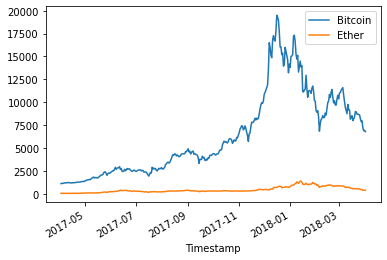

In [61]:
df_cleaned.plot()

<h1>Cleaning Analysis</h1>
Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use analytical methods to identify these outliers or these skewed values.

<h2>Central Tendency</h2>
We'll use a set of common indicators of to measure central tendency and identify these outliers:

<h3>mean</h3>
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [62]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [63]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [64]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

In [65]:
df_cleaned.median()

Bitcoin    4580.38748
Ether       309.32000
dtype: float64

In [ ]:
highest_earning_country = df['native-country'].max(df.count(df['salary']=='>50k'))